# Analysis - (Length of Stay > 7 Days)

## Set-up data for the experiments

### Read data matrix

In [2]:
import os
import pandas as pd


datamatrixDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/final/data_matrix.csv''')
datamatrixDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_Red blood cell count_last,labs_Calcium level_last,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,4.37,9.5,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,3.29,7.6,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,3.34,7.9,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,3.14,8.2,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,2.86,8.0,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,3.37,8.1,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,3.32,7.8,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,4.10,8.0,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,3.80,8.5,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0


### Read patients file

In [3]:
import os
import pandas as pd


patientDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/eICU/patient.csv''')
patientDf

,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
0,141168,128919,Female,70,Caucasian,59,91,"Rhythm disturbance (atrial, supraventricular)",152.4,15:54:00,...,Direct Admit,1,admit,84.3,85.8,03:50:00,3596,Death,Expired,002-34851
1,141178,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,Emergency Department,1,admit,54.4,54.4,09:18:00,8,Step-Down Unit (SDU),Alive,002-33870
2,141179,128927,Female,52,Caucasian,60,83,NaN,162.6,08:56:00,...,ICU to SDU,2,stepdown/other,NaN,60.4,19:20:00,2042,Home,Alive,002-33870
3,141194,128941,Male,68,Caucasian,73,92,"Sepsis, renal/UTI (including bladder)",180.3,18:18:40,...,Floor,1,admit,73.9,76.7,15:31:00,4813,Floor,Alive,002-5276
4,141196,128943,Male,71,Caucasian,67,109,NaN,162.6,20:21:00,...,ICU to SDU,2,stepdown/other,NaN,63.2,22:23:00,1463,Floor,Alive,002-37665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200854,3353235,2743084,Male,50,Caucasian,458,1109,"CHF, congestive heart failure",175.3,04:55:00,...,Emergency Department,1,admit,90.0,99.2,23:18:00,1069,Telemetry,Alive,035-16382
200855,3353237,2743086,Female,79,Caucasian,458,1106,"Embolus, pulmonary",162.6,01:45:00,...,Direct Admit,1,admit,78.4,81.4,23:08:00,1269,Step-Down Unit (SDU),Alive,035-751
200856,3353251,2743099,Male,73,African American,458,1104,Cardiac arrest (with or without respiratory ar...,177.8,12:51:00,...,Emergency Department,1,admit,102.0,96.2,23:16:00,16259,Telemetry,Alive,035-5166
200857,3353254,2743102,Male,81,Caucasian,459,1108,"Bleeding, lower GI",185.4,07:43:00,...,Emergency Department,1,admit,83.9,92.9,19:25:00,431,Step-Down Unit (SDU),Alive,035-19511


### Merge files

In [4]:
dataMergedDf = datamatrixDf.merge(
    patientDf[['patientunitstayid', 'unitdischargeoffset']],
    how='left',
    left_on=['visit_occurrence_id'],
    right_on=['patientunitstayid']
    )
dataMergedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCV - Mean corpuscular volume_last,labs_MCHC - Mean corpuscular haemoglobin concentration_last,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,90.4,34.9,31.6,3.8,15.5,97.0,21.0,19.0,141515,8882
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,92.1,34.3,31.6,10.0,16.7,154.0,21.0,14.0,141515,8882
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,91.6,33.7,30.8,12.9,17.3,105.0,22.0,13.0,141515,8882
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,91.4,33.8,30.9,11.7,17.0,123.0,22.0,12.0,141515,8882
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,95.1,33.1,31.5,9.9,17.2,116.0,22.0,14.0,141515,8882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,92.0,35.0,32.0,14.4,13.7,62.0,19.0,6.0,3352884,3390
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,92.0,35.0,33.0,11.4,14.1,98.0,21.0,3.0,3352884,3390
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,88.0,33.0,29.0,8.7,17.5,143.0,25.0,7.0,3352922,5096
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,87.0,33.0,29.0,6.9,17.4,159.0,25.0,7.0,3352922,5096


### Create Length of Stay Targets

In [5]:
dataMergedDf['los_gt_seven_days'] = (dataMergedDf.unitdischargeoffset > (7 * 24 * 60))
dataMergedDf['los_gt_seven_days'].value_counts()

los_gt_seven_days
True     32332
False    23905
Name: count, dtype: int64

In [6]:
dataMergedDf['los_gt_fourteen_days'] = (dataMergedDf.unitdischargeoffset > (14 * 24 * 60))
dataMergedDf['los_gt_fourteen_days'].value_counts()

los_gt_fourteen_days
False    38521
True     17716
Name: count, dtype: int64

### Save files

In [7]:
dataMergedDf

,person_id,visit_occurrence_id,measurement_date,visit_start_date_adm,death_adm,vitals_systemic_mean_avg,vitals_systemic_diastolic_avg,vitals_systemic_systolic_avg,vitals_respiration_avg,vitals_heartrate_avg,...,labs_MCH - Mean corpuscular haemoglobin_last,labs_White blood cell count_last,labs_Red blood cell distribution width_last,labs_Glucose level_last,labs_Bicarbonate level_last,labs_Anion gap_last,patientunitstayid,unitdischargeoffset,los_gt_seven_days,los_gt_fourteen_days
0,248364,141515,2014-04-04,2014-04-04,0,65.344086,47.924731,105.265233,25.763066,89.777003,...,31.6,3.8,15.5,97.0,21.0,19.0,141515,8882,False,False
1,248364,141515,2014-04-05,2014-04-04,0,68.147368,51.291228,99.049123,23.763889,101.937500,...,31.6,10.0,16.7,154.0,21.0,14.0,141515,8882,False,False
2,248364,141515,2014-04-06,2014-04-04,0,78.180556,57.565972,111.343750,23.731707,109.117021,...,30.8,12.9,17.3,105.0,22.0,13.0,141515,8882,False,False
3,248364,141515,2014-04-07,2014-04-04,0,82.724739,57.696864,123.606272,33.772727,79.000000,...,30.9,11.7,17.0,123.0,22.0,12.0,141515,8882,False,False
4,248364,141515,2014-04-08,2014-04-04,0,75.000000,53.103306,114.359504,30.335664,81.479021,...,31.5,9.9,17.2,116.0,22.0,14.0,141515,8882,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56232,3521842,3352884,2014-01-29,2014-01-28,0,89.946929,66.934130,137.592436,19.909722,100.312500,...,32.0,14.4,13.7,62.0,19.0,6.0,3352884,3390,False,False
56233,3521842,3352884,2014-01-30,2014-01-28,0,73.849266,50.696327,127.106241,21.030612,82.459184,...,33.0,11.4,14.1,98.0,21.0,3.0,3352884,3390,False,False
56234,358073,3352922,2015-06-02,2015-06-01,0,78.000000,64.023256,97.302326,17.929821,77.197917,...,29.0,8.7,17.5,143.0,25.0,7.0,3352922,5096,False,False
56235,358073,3352922,2015-06-03,2015-06-01,0,106.010242,78.054524,160.937190,19.117647,97.704861,...,29.0,6.9,17.4,159.0,25.0,7.0,3352922,5096,False,False


In [8]:
dataMergedDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv', index=False)

## Perform Cross-Validation

In [34]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Evaluate ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv -tc "los_gt_seven_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(600) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/results/wb_0_wa_3_los_gt_7_days.json;'''
    )


2023-12-11 15:17:13,452 - EHR-ML - INFO - Parsing command line arguments
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix.csv
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.target_column: los_gt_seven_days
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.window_before: 0
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.window_after: 600
2023-12-11 15:17:13,453 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/results/wb_0_wa_3_los_gt_7_days.json
2023-12-11 15:17:14,510 - EHR-ML - INFO - Split data to test and 

## Create Test and Train Splits

In [9]:
from sklearn.model_selection import train_test_split


trainDf, testDf = train_test_split(dataMergedDf[['person_id', 'visit_occurrence_id']].drop_duplicates(), test_size=0.2, random_state=42)

trainDf.shape, testDf.shape

((8916, 2), (2230, 2))

In [13]:
dataMergedTrainDf = dataMergedDf.merge(trainDf, how='inner', on=['person_id', 'visit_occurrence_id'])
dataMergedTestDf = dataMergedDf.merge(testDf, how='inner', on=['person_id', 'visit_occurrence_id'])

dataMergedTrainDf.shape, dataMergedTestDf.shape

((45058, 129), (11179, 129))

In [14]:
dataMergedTrainDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv', index=False)
dataMergedTestDf.to_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv', index=False)

## Build a Model

In [15]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Build ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv -tc "los_gt_seven_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(600) + ''' -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/model/model_los_gt_seven_days.pkl;'''
    )


2023-12-11 16:14:40,914 - EHR-ML - INFO - Parsing command line arguments
2023-12-11 16:14:40,915 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_train.csv
2023-12-11 16:14:40,915 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-11 16:14:40,915 - EHR-ML - INFO - args.target_column: los_gt_seven_days
2023-12-11 16:14:40,915 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-11 16:14:40,915 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-11 16:14:40,916 - EHR-ML - INFO - args.window_before: 0
2023-12-11 16:14:40,916 - EHR-ML - INFO - args.window_after: 600
2023-12-11 16:14:40,916 - EHR-ML - INFO - args.save_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/model/model_los_gt_seven_days.pkl
2023-12-11 16:14:41,654 - EHR-ML - INFO - Split data to test a

0

## Obtain predictions from the model

In [16]:
import os


os.system(
    'cd ' + os.environ['EHR_ML_BASE'] + ';'
    +
    '''.venv/bin/python -m ehrml.ensemble.Predict ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv -tc "los_gt_seven_days" -ic "person_id" "visit_occurrence_id" -mdc "measurement_date" -adc "visit_start_date_adm" -wb ''' + str(0) + ''' -wa ''' + str(600) + ''' -mp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/model/model_los_gt_seven_days.pkl -sp ''' + os.environ['EICU_EHR_PIPELINE_BASE'] + '''/data/experiments/05_predict_length_of_stay/results/preds_los_gt_seven_days.csv;'''
    )


2023-12-11 16:44:23,017 - EHR-ML - INFO - Parsing command line arguments
2023-12-11 16:44:23,018 - EHR-ML - INFO - args.data_file: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/datamatrix/data_matrix_test.csv
2023-12-11 16:44:23,018 - EHR-ML - INFO - args.id_columns: ['person_id', 'visit_occurrence_id']
2023-12-11 16:44:23,018 - EHR-ML - INFO - args.target_column: los_gt_seven_days
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.measurement_date_column: measurement_date
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.anchor_date_column: visit_start_date_adm
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.window_before: 0
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.window_after: 600
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.model_path: /home/yram0006/phd/chapter_2/workspace/eICU-EHR-Pipeline/data/experiments/05_predict_length_of_stay/model/model_los_gt_seven_days.pkl
2023-12-11 16:44:23,019 - EHR-ML - INFO - args.save_path: /hom

0

## Prediction Analysis

### Read predictions

In [17]:
import os
import pandas as pd


predsDf = pd.read_csv(os.environ['EICU_EHR_PIPELINE_BASE'] + '/data/experiments/05_predict_length_of_stay/results/preds_los_gt_seven_days.csv')
predsDf

,person_id,visit_occurrence_id,preds
0,2473,237159,0.000098
1,2839,163173,0.142573
2,3071,3103539,0.999729
3,3111,3160037,0.507358
4,3570,3342265,0.000047
...,...,...,...
2224,27213578,2769226,0.000966
2225,27214288,2825787,0.000054
2226,27214462,2841565,0.000650
2227,27214485,2709648,0.999736


In [18]:
resultsDf = predsDf.merge(dataMergedTestDf[['person_id', 'visit_occurrence_id', 'los_gt_seven_days']].drop_duplicates(), on=['person_id', 'visit_occurrence_id'])
resultsDf

,person_id,visit_occurrence_id,preds,los_gt_seven_days
0,2473,237159,0.000098,False
1,2839,163173,0.142573,False
2,3071,3103539,0.999729,True
3,3111,3160037,0.507358,False
4,3570,3342265,0.000047,False
...,...,...,...,...
2224,27213578,2769226,0.000966,False
2225,27214288,2825787,0.000054,False
2226,27214462,2841565,0.000650,False
2227,27214485,2709648,0.999736,True


### Prediction Distribution

/tmp/ipykernel_584864/4126068900.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resultsDf.preds, hist=False, rug=False)


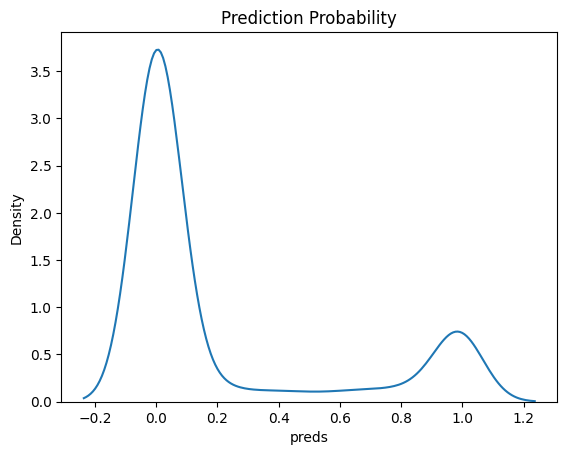

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.distplot(resultsDf.preds, hist=False, rug=False)
plt.title('Prediction Probability')
plt.show()

### Descriptive metrics

In [30]:
from sklearn.metrics import accuracy_score


print('LOS Greater than 7 days prediction accuracy: ', str(accuracy_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction accuracy:  0.9143113503813369


In [31]:
from sklearn.metrics import balanced_accuracy_score


print('LOS Greater than 7 days prediction balanced accuracy: ', str(balanced_accuracy_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction balanced accuracy:  0.889965737894896


In [32]:
from sklearn.metrics import precision_score


print('LOS Greater than 7 days prediction average precision: ', str(precision_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction average precision:  0.7529880478087649


In [33]:
from sklearn.metrics import f1_score


print('LOS Greater than 7 days prediction F1: ', str(f1_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction F1:  0.79831045406547


In [34]:
from sklearn.metrics import roc_auc_score


print('LOS Greater than 7 days prediction AUROC: ', str(roc_auc_score([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction AUROC:  0.8899657378948961


In [35]:
import os
import sys

sys.path.append(os.environ['EICU_EHR_PIPELINE_BASE'] + "/EHR-ML")


from ehrml.utils import MlUtils

print('LOS Greater than 7 days prediction MCC-F1: ', str(MlUtils.calculateMccF1([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days)))

LOS Greater than 7 days prediction MCC-F1:  0.8315293632198504


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10), title='Confusion Matrix for the classifier'):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm_perc, annot=annot, fmt='', ax=ax, cmap='RdPu', annot_kws={"size":16})
    #plt.savefig(filename)
    plt.title(title)
    plt.show()


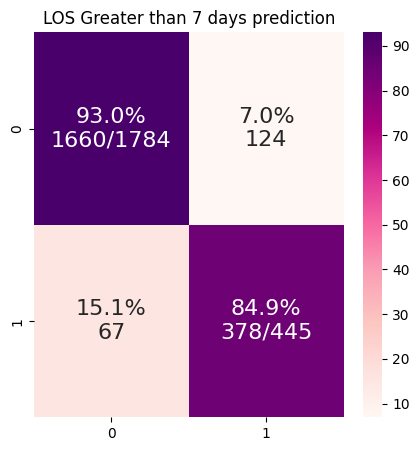

In [37]:
cm_analysis([ 0 if pred < 0.5 else 1 for pred in resultsDf.preds], resultsDf.los_gt_seven_days, [0, 1], ymap=None, figsize=(5, 5), title='LOS Greater than 7 days prediction')

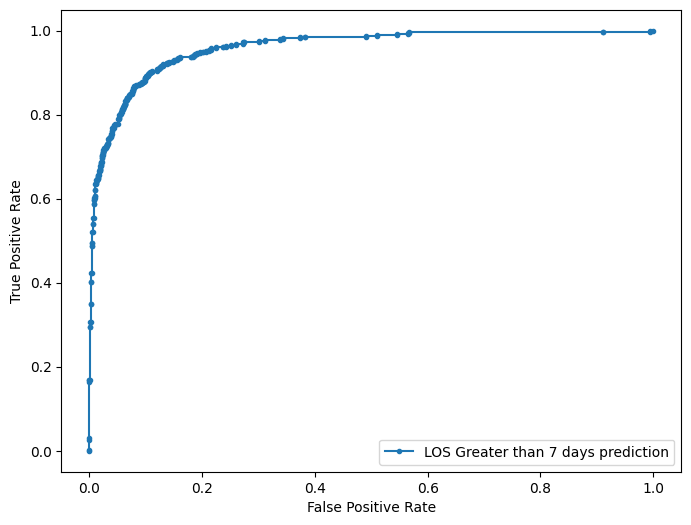

In [38]:
from sklearn.metrics import roc_curve


plt.figure(figsize=(8, 6))

fpr, tpr, _  = roc_curve(resultsDf.los_gt_seven_days, resultsDf.preds)
plt.plot(fpr, tpr, marker='.', label='LOS Greater than 7 days prediction')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
